# Homework 3: Two-dimensional liquids and solids

In [1]:
%matplotlib inline
import random, pylab, math, random, cmath

# Introduction

In this homework set, we study the liquid-solid phase transition of a system of hard disks. This transition was first observed in numerical simulations by Alder and Wainwright (1962). It is the first phase transition identified in a continous two-dimensional system. In this problem, the box is a square of length 1.0, with periodic boundary conditions and the algorithm is made to work for $N = k^2$ disks.

Before you start, please remind yourself of the way python handles the modulo operator:

In [2]:
print "1.2 % 1.0 = ", 1.2 % 1.0
print "-0.2 % 1.0 =", -0.2 % 1.0

1.2 % 1.0 =  0.2
-0.2 % 1.0 = 0.8


## A1 In this section we provide preparation programs:
PREPARATION PROGRAM 1:

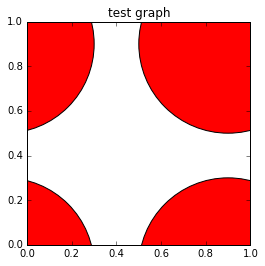

In [3]:
def show_conf(L, sigma, title, fname):
    pylab.axes()
    for [x, y] in L:
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius = sigma, fc = 'r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    pylab.savefig(fname)
    pylab.show()

L = [[0.9, 0.9]]
sigma = 0.4
show_conf(L, sigma, 'test graph', 'one_disk.png')

PREPARATION PROGRAM 2:

In [4]:
import os, random

filename = 'disk_configuration.txt'

if os.path.isfile(filename):
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print 'starting from file', filename
else:
    L = []
    for k in range(3):
        L.append([random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)])
    print 'starting from scratch'

L[0][0] = 3.3
f = open(filename, 'w')
for a in L:
    f.write(str(a[0]) + ' ' + str(a[1]) + '\n')
f.close()

starting from scratch


Make sure that you understand both programs, and answer the following questions:

* How is the periodic boundary condition implemented in Program 1?
* What does the "if os.path.isfile(filename)" condition in Program 2 test?
* What is this program's potential use?

# B Markov-chain Monte Carlo simulation

In this section, you will be writing you own MCMC program for hard disks. It will not be sophisticated, but still correct, support input-output, and compute a non-trivial order parameter.

## B1

Start from the code snippet given below, which was introduced in the lecture, and also get inspiration from the method dist(), previously discussed as well. Modify the algorithm so that it implements periodic boundary conditions. Run this algorithm for four disks and a density $\eta = 0.72$.

Note: there are no walls and therefore no more wall collisions. Use the modulo operator discussed above in order to ensure that, after each accepted move, x and y positions of each disk are folded back into the interval $0.0 \leq x < 1.0$.

In [5]:
L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
sigma_sq = sigma ** 2
delta = 0.1
n_steps = 1000

for steps in range(n_steps):
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta),
         a[1] + random.uniform(-delta, delta)]
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a)
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b
print L

[[0.36657897110607135, 0.2491605395607672], [0.7425842698956532, 0.18715128507256662], [0.17170094947113934, 0.6732149407042414], [0.806088134981106, 0.7736442217668903]]


In [6]:
def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)

## B2

Further modify your program by using Preparation program 1, so that you can plot the **final configuration** produced by it. Do not attempt to plot intermediate configurations, which would lead to display issues.

Make sure it invokes periodic boundary conditions (at least one disk should be cut up into at least two pieces).

## B3

Further modify your program, incorporating Preparation program 2, so that it can obtain its
initial configuration either from a file (if it exists) or otherwise from the program itself. To generate its own
initial configuration, generalize the four-disk square-lattice initial configuration:

In [7]:
L = [[0.25, 0.25], [0.25, 0.75], [0.75, 0.25], [0.75, 0.75]]

so that it supports any value $N = k^2$ of disks. The proper initial condition for k=8 (N=64) is shown in the figure below. Use a stepsize $\propto \sigma$, for example $0.3 \sigma$, or $0.5 \sigma$. The precise value itself in unimportant. Use k = int(math.sqrt(N) + 0.5). In your program, manipulate the density eta and the number of disks N rather
than the radius sigma. The program should work for N equal to a square number, not for general N. The
final configuration should then be saved to file, as indicated in Preparation program 2, ready for reuse at
the next run of the program.

<img src="HW3_figs/N_disks.png">

* Indicate up to which density the square-lattice initial configuration is legal.
* Plot the initial configuration (as a graphics file) for N = 256 at density eta= 0.72. (Note that you can
do this easily by setting n_steps = 0)

## B4

Run your program for N = 64, n_steps = 10000, at eta = 0.42, from the square lattice initial condition, then repeatedly using as initial configuration the final configuration of the previous run.

1. Explain what you see. 
2. Display a figure showing the initial configuration of the sequence of runs (set n_steps = 0 to plot it)
3. Display a figure showing and the final configuration you obtained from the entire sequence of runs.

## B5

Run your program for N = 64, n_steps = 10000, at eta = 0.72 from the square lattice initial condition, then at least ten times using as initial configuration the final configuration of the previous run.

1. Explain what you see.
2. Display figures showing intermediate configurations of the entire run.
3. Display the final configuration you obtained from the entire sequence of runs. (You may plot the figures in the notebook or save them as a bunch of graphic files and add them to your repository)

# C

This section deals with the quantitative interpretation of the findings of B4 and B5. It contains a programming assignment for which help is provided in the form of a code snippet.

Consider the local order parameter psi_6(i), for disk $i$:

$$
\psi_6(k) = \dfrac{1}{\text{number of neighbors l of k}} \sum\limits_l \exp(6 i \phi_{kl})
$$
The local order parameter $\psi_6(k)$ is a complex number, and $\phi_{kl}$ is the angle with respect to the x-axis, measured in radians. A "neighbor" $l$ is a different disk located in the vicinity of disk $k$; we will assume it is a disk whose center is less than $2.8 \sigma$ away from the center of disk $k$.

## C1

Consider the disks a, b, and c, the central disks in the following figures.

<img src="HW3_figs/psi_configs.png">

1. What is the value of $\psi_6(a)$?
2. What is the value of $\psi_6(b)$?
3. What is the value of $\psi_6(c)$?
4. Compute $\psi_6(a) + \psi_6(b)$.

## C2

The global order parameter is defined as

$$
\Psi_6 = \dfrac{1}{N} \sum\limits_k \psi_6(k)
$$

1. What is the value of $\Psi_6$ for the below configurations A and B? we suppose that they occur on an initiely large plane and respect translational symmetry.
2. What is the value of Psi_6 for a very large liquid configuration with eta = 0.42, (N very large, all
correlation lengths much smaller than system size)?

<img src="HW3_figs/glob_psi_configs.png">

## C3

It can be shown numerically that $\Psi_6$ is finite for very large systems of hard disks at density $\eta > 0.72$, as in our example. Incorporate the calculation of Psi_6 into your MCMC program, using the following code snippe.

Please note the following:

* The cmath library is needed to perform complex arithmethic.
* 6j = (0.0, 6.0), in complex notation.
* The delx_dely function computes the distance vector, taking into accoung periodic boundary conditions.
* It is assumed that the dist() method returns the squared Euclidean distance.

In [8]:
def delx_dely(x, y):
    d_x = (x[0] - y[0]) % 1.0
    if d_x > 0.5: d_x -= 1.0
    d_y = (x[1] - y[1]) % 1.0
    if d_y > 0.5: d_y -= 1.0
    return d_x, d_y

def Psi_6(L, sigma):
    sum_vector = 0j
    for i in range(N):
        vector  = 0j
        n_neighbor = 0
        for j in range(N):
            if dist(L[i], L[j]) < 2.8 * sigma and i != j:
                n_neighbor += 1
                dx, dy = delx_dely(L[j], L[i])
                angle = cmath.phase(complex(dx, dy))
                vector += cmath.exp(6.0j * angle)
        if n_neighbor > 0: vector /= n_neighbor
        sum_vector += vector
    return sum_vector / float(N)

Incorporate this snippet into your program, and produce a figure showing the mean absolute value of $\Psi_6$ as a function of the density $\eta$ for $N = 64$, up to the density $\eta = 0.72$. For simplicity:

* you may start at $\eta = 0.72$ (with a "well-thermalized" configuration)
* compute $|\Psi_6|$ every 100 steps
* decrease the density by 0.01 after each 10,000 steps, using as initial configuration the final configuration at higher density.

Your plot will be only qualitative at high density, because we cannot reach large enough simulation times, even for 64
disks only, but the procedure is fine. The finite values of $|\Psi_6|$ at small density is a finite-N effect. 

1. Display both your program and the obtain profile below.

The nature of this phase transition has been a mystery for several decades, and its detailed description is beyond the scope of this homework. The seminal simulations of Metropolis et al (1953) used N between 56 and 224, and n_steps = 20000. These simulation times are roughly 1000000 times smaller than the correlation times of the Markov chain for $\eta = 0.72$, and this explains much of the confusion in the field. Mathematical estimates for the correlation time are unavailable. Likewise, the existence of the transition(s), while established beyond doubt by numerical simulations, is a mathematical mystery, unlike the two other transitions that we will treat in this course (Bose-Einstein condensation, ferromagnetic-paramagnetic transition).